In [129]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [130]:
# 📌 CSV'den veri oku (senin dosyanı buraya koyman yeterli)
df = pd.read_csv("Sunspots_new.csv")


# 🧹 Gerekli kolonları ayır
target_column = "Monthly Mean Total Sunspot Number"       # Tahmin edilecek değer
date_column = "Date"            # Grafik için kullanılacak

X = df.drop(columns=[target_column, date_column])
y = df[target_column]
dates = pd.to_datetime(df[date_column])  # Tarihleri zaman ekseni olarak kullanacağız


In [131]:
# 🔍 Zaman sırasını bozmadan %80 eğitim, %20 test
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
date_test = dates.iloc[split_index:]


In [132]:
from lightgbm import early_stopping, log_evaluation

model = lgb.LGBMRegressor()


model.fit(X_train, y_train,)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2548, number of used features: 4
[LightGBM] [Info] Start training from score 82.550785


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [133]:
# 🔍 Tahmin yap
y_pred = model.predict(X_test)

# 🎯 Performans metrikleri
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.3f}")


Test RMSE: 8.28
Test R² Score: 0.998


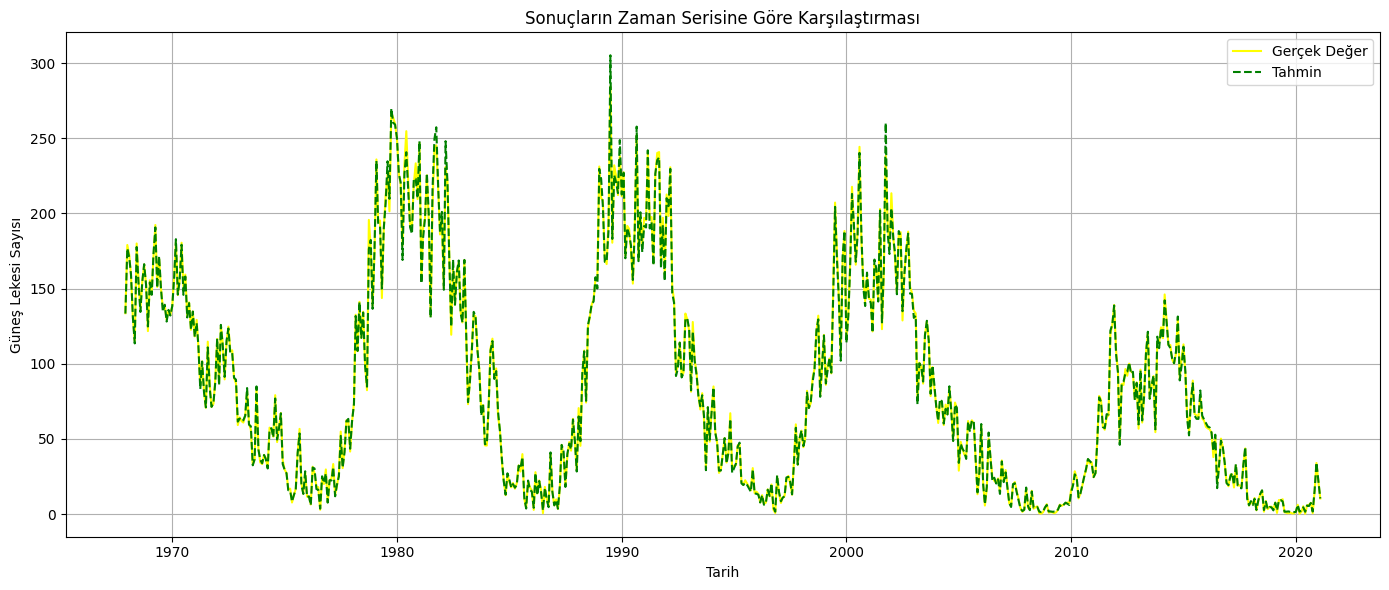

In [134]:
plt.figure(figsize=(14, 6))
plt.plot(date_test, y_test.values, label="Gerçek Değer", color='yellow')
plt.plot(date_test, y_pred, label="Tahmin", color='green', linestyle='--')
plt.title("Sonuçların Zaman Serisine Göre Karşılaştırması")
plt.xlabel("Tarih")
plt.ylabel("Güneş Lekesi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


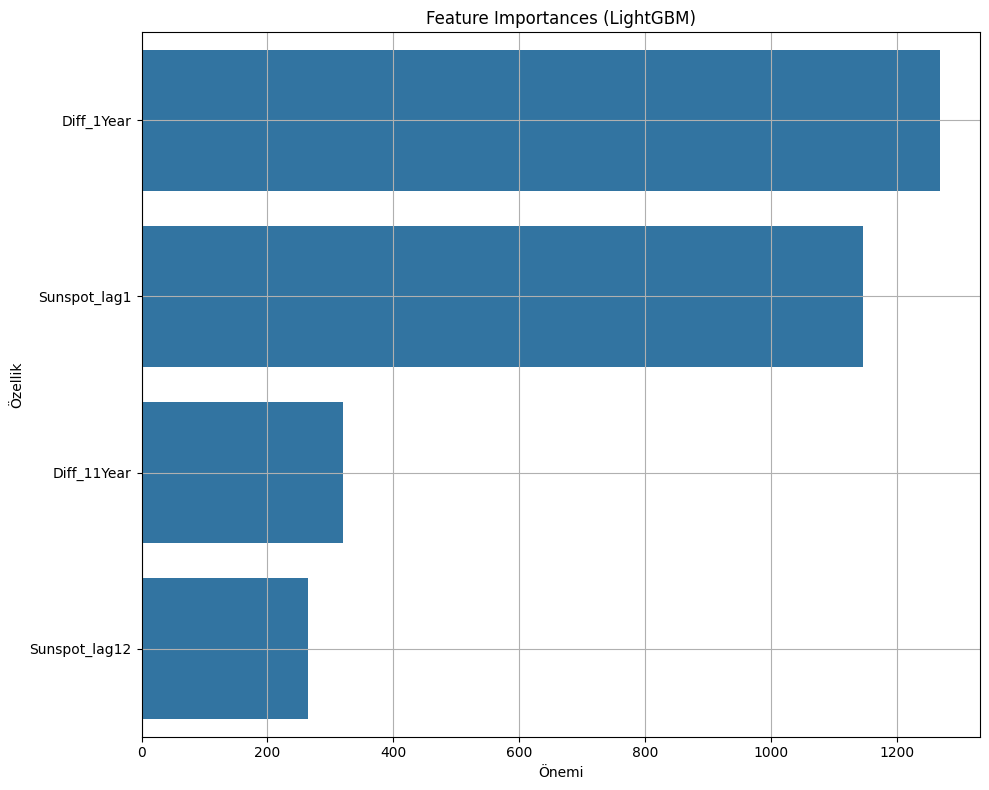

In [135]:
# 🔍 Feature importance
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# En önemli ilk 20 feature
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.title("Feature Importances (LightGBM)")
plt.xlabel("Önemi")
plt.ylabel("Özellik")
plt.tight_layout()
plt.grid()
plt.show()


In [136]:
# 📉 Önemsiz feature’lar (örnek: önem seviyesi 20’nin altında olanlar)
low_importance_features = feature_imp[feature_imp < 20].index.tolist()
print("Çıkarılacak features:", low_importance_features)

# 🧹 Bu feature’ları X’ten çıkar
X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)


Çıkarılacak features: []
